In [4]:


class Value:
    def __init__(self,data,children=(),op="",label=""):
        
        # if list then multiple pointers to same child may occur : not needed???
        
        self.data=data
        self._prev=set(children)
        self._op=op
        self.label=label
        
    def __repr__(self) -> str:
        return f"Value({self.data})"
    
    def __add__(self,second):
        return Value(self.data+second.data,(self,second),"+")
    
    def __mul__(self,second):
        return Value(self.data*second.data,(self,second),"*")
    
    def __pow__(self,second):
        return Value(self.data**second.data,(self,second),"**")
    
    def __sub__(self,second):
        return Value(self.data-second.data, (self,second),"-")
    
    


a=Value(4)
b=Value(-5)
c=Value(6)
d=a+a*b-c
print(d._prev)


{Value(-16), Value(6)}


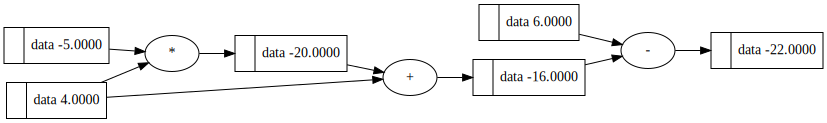

In [5]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

draw_dot(d)